In [1]:
#This is the Main submission from ASHUTOSH JHA from MANIPAL INSTITUTE OF TECHNOLOGY , REGISTRATION NUMBER 210907370 

In [2]:
#we are importing all the libraries which we might need and we are importing them in groups based on their functionality

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math
import itertools
import time
import timeit



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor




# Modelling Helpers :
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns




# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

2023-07-14 12:14:31.925184: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#we need to install necessary packages
!pip install visualkeras

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import visualkeras
from keras.utils import plot_model

In [5]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

# Make Visualizations better
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [6]:
# we are loadind the dataset here
# IMP NOTE : we need to upload the dataset to our notebook first and then copy paste the path here
train = pd.read_csv('fashion-mnist_train.csv')
test = pd.read_csv('fashion-mnist_test.csv')
df = train.copy()
df_test = test.copy()

In [7]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# checking the shape of the training and testing data
print('Train: ', df.shape)
print('Test: ', df_test.shape)

Train:  (60000, 785)
Test:  (10000, 785)


In [9]:
df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [10]:
# checking for data discrepencies in Train data
df.isnull().any().sum()

0

In [11]:
# checking for data discrepencies in Train data
df_test.isnull().any().sum()

0

In [12]:
# Mapping Classes
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

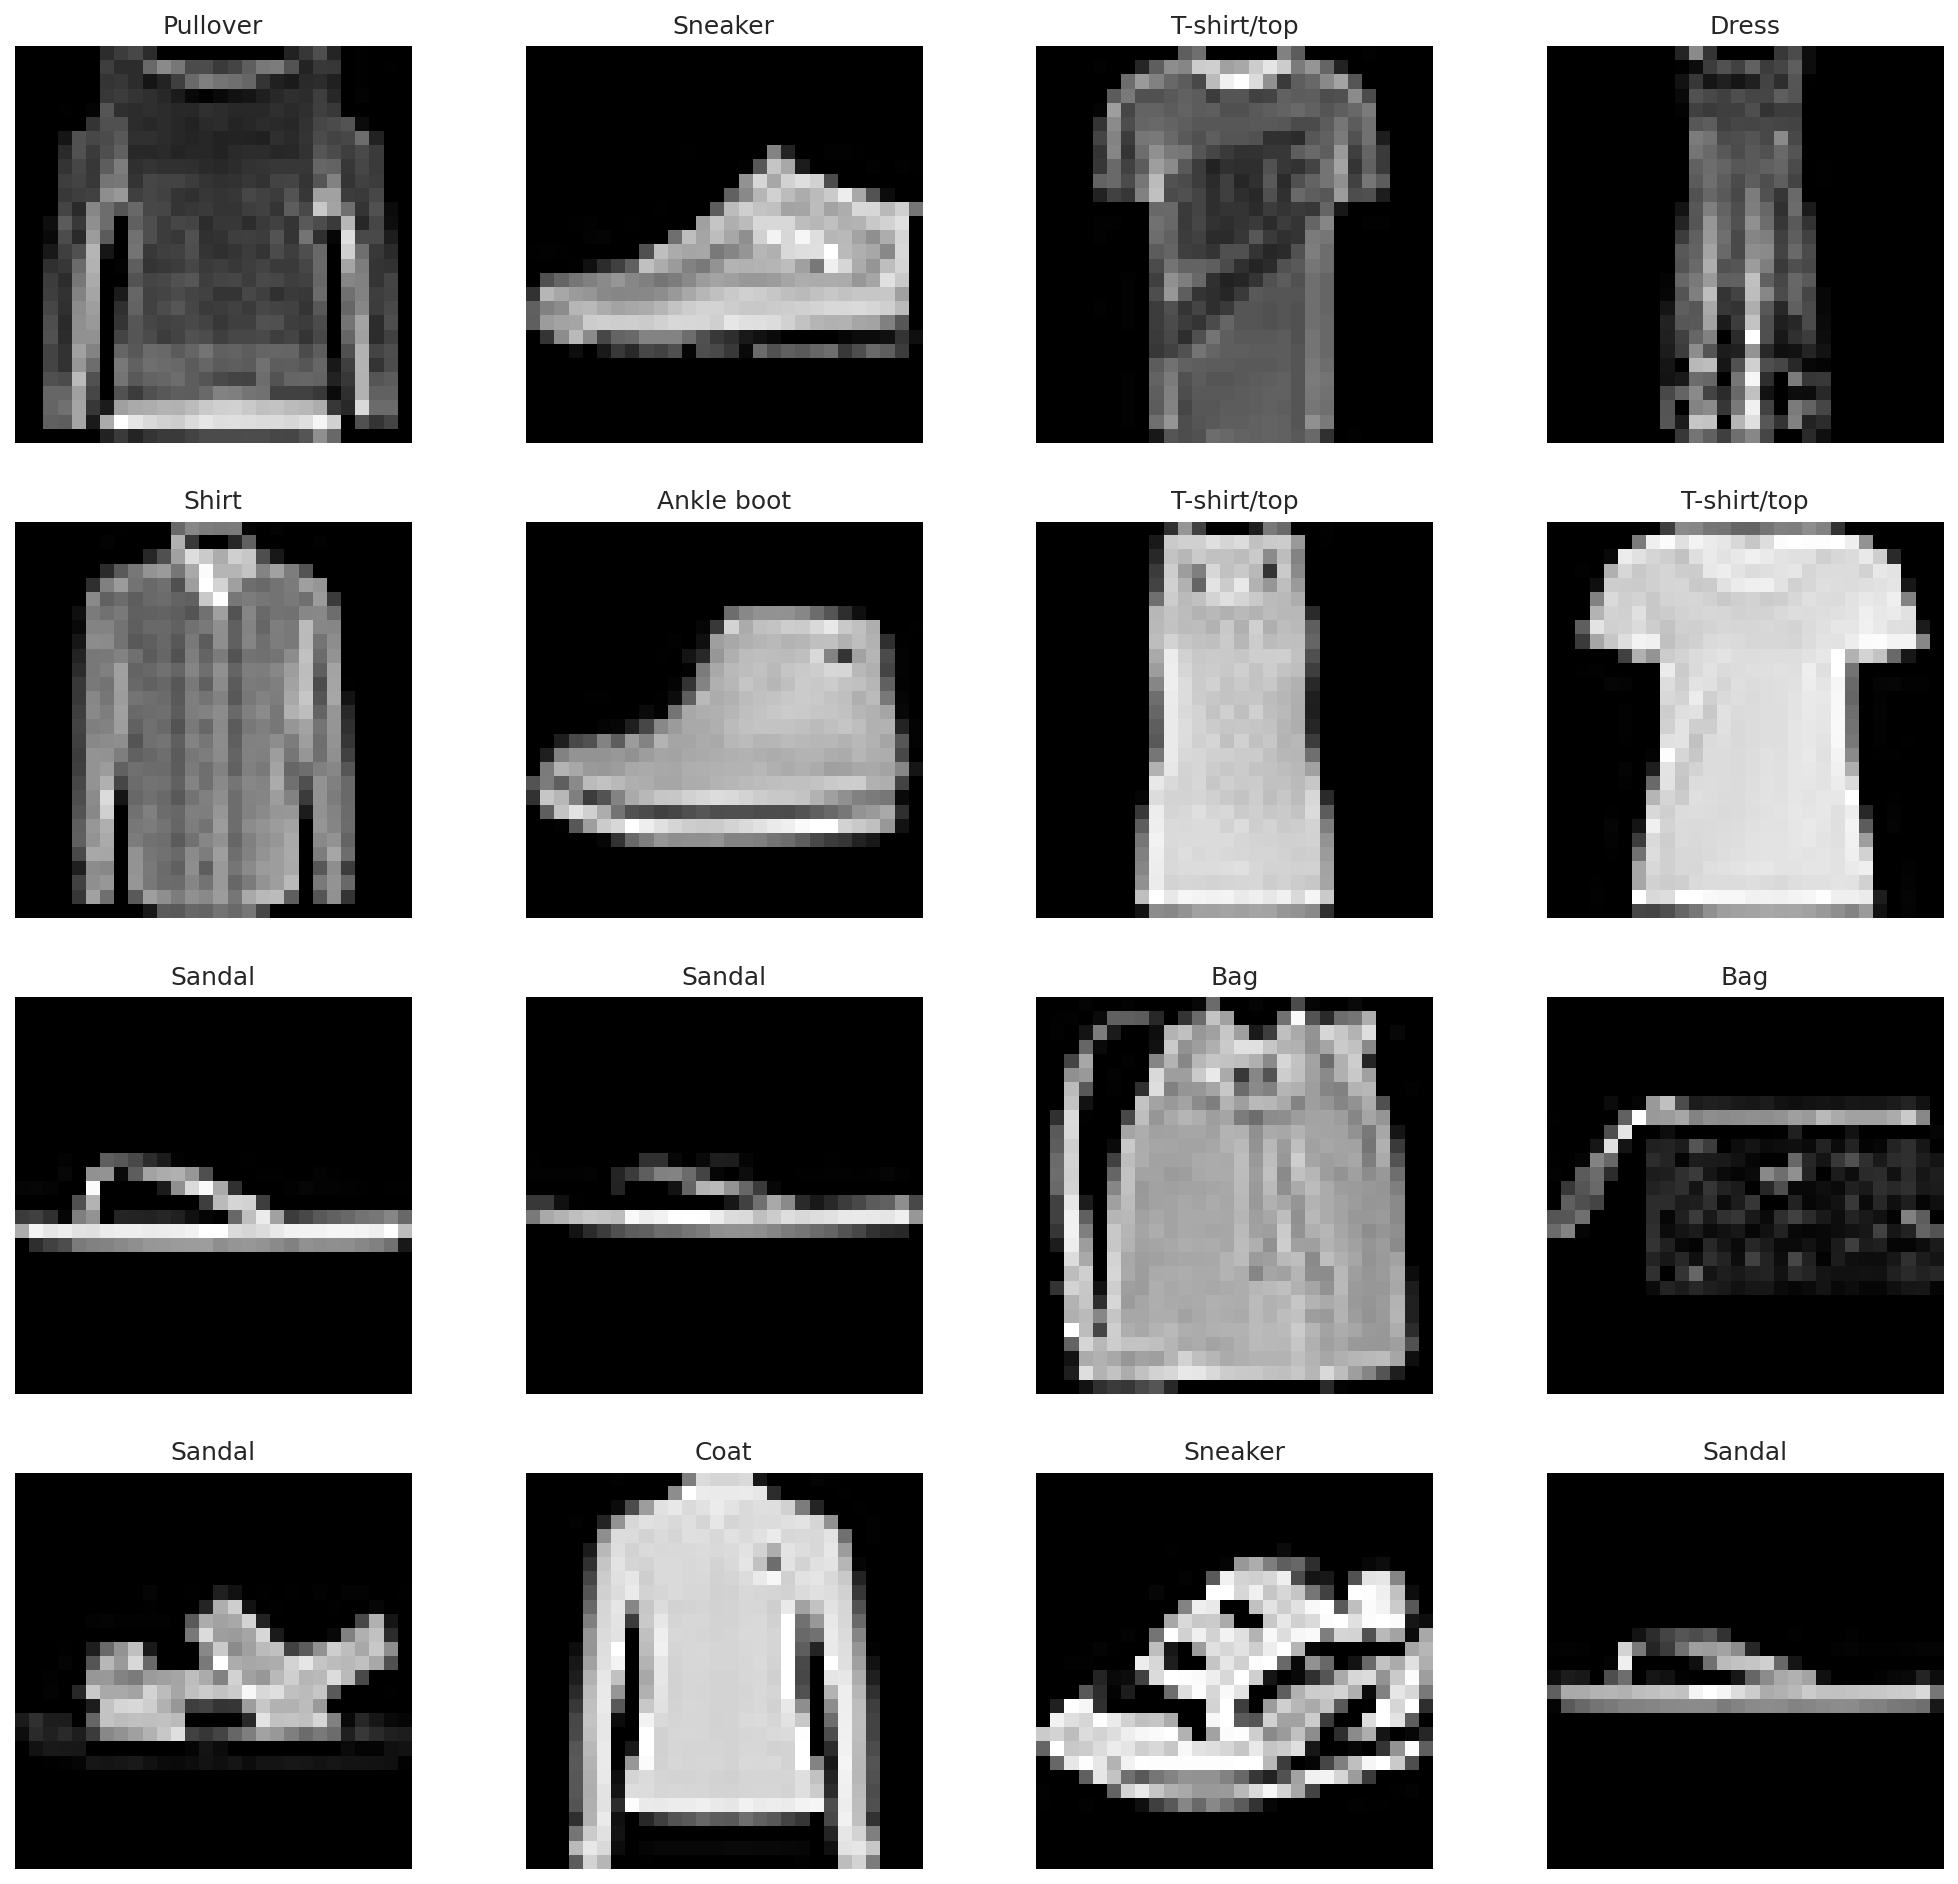

In [13]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(clothing[cloths])
        axe.set_axis_off()

In [14]:
df['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [15]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

In [16]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [17]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

# reshape(examples, height, width, channels)
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

df_test.drop('label', axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))

In [18]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255

In [19]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [20]:
print(y_train.shape)
print(y_test.shape)

(54000, 10)
(6000, 10)


In [21]:
# Building a CNN architecture from scratch 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same',
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2023-07-14 12:15:38.299731: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [22]:
# Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

In [23]:
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

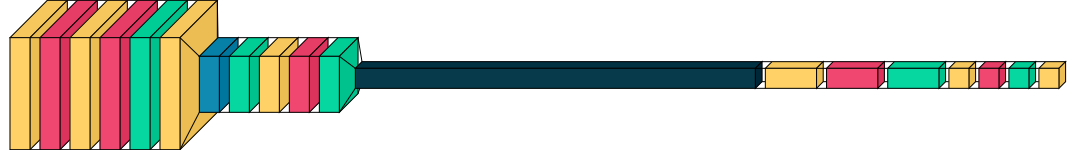

In [25]:
visualkeras.layered_view(model)

In [26]:
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [27]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [28]:
datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [29]:
datagen.fit(x_train)

In [30]:
batch_size = 128
epochs = 40

In [31]:
# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (x_test, y_test), verbose=2,
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

2023-07-14 12:15:38.988439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/40
421/421 - 262s - loss: 0.8358 - accuracy: 0.7024 - val_loss: 0.9838 - val_accuracy: 0.6050 - lr: 0.0010 - 262s/epoch - 622ms/step
Epoch 2/40
421/421 - 265s - loss: 0.5470 - accuracy: 0.8011 - val_loss: 0.4115 - val_accuracy: 0.8442 - lr: 9.0000e-04 - 265s/epoch - 630ms/step
Epoch 3/40
421/421 - 261s - loss: 0.4704 - accuracy: 0.8294 - val_loss: 0.3480 - val_accuracy: 0.8730 - lr: 8.1000e-04 - 261s/epoch - 621ms/step
Epoch 4/40
421/421 - 261s - loss: 0.4298 - accuracy: 0.8460 - val_loss: 0.3044 - val_accuracy: 0.8897 - lr: 7.2900e-04 - 261s/epoch - 620ms/step
Epoch 5/40
421/421 - 264s - loss: 0.3946 - accuracy: 0.8560 - val_loss: 0.2854 - val_accuracy: 0.8938 - lr: 6.5610e-04 - 264s/epoch - 628ms/step
Epoch 6/40
421/421 - 263s - loss: 0.3764 - accuracy: 0.8645 - val_loss: 0.2687 - val_accuracy: 0.8998 - lr: 5.9049e-04 - 263s/epoch - 626ms/step
Epoch 7/40
421/421 - 261s - loss: 0.3599 - accuracy: 0.8717 - val_loss: 0.2742 - val_accuracy: 0.8982 - lr: 5.3144e-04 - 261s/epoch - 

In [75]:
TF_ENABLE_ONEDNN_OPTS= 1

In [76]:
# Select a sample image for inference
sample_input = x_train[0:1]


In [77]:
# Warm up the model
_ = model.predict(sample_input)


1/1 [==============================] - 0s 139ms/step


In [78]:
# Define the number of iterations for measurement
num_iterations = 100

In [79]:
# Function to run the inference and measure the time
def inference_time():
    _ = model.predict(sample_input)

In [80]:
# Measure the inference time
elapsed_time = timeit.timeit(inference_time, number=num_iterations)

1/1 [==============================] - 0s 30ms/step


In [81]:
# Calculate the average inference time per iteration
average_latency = elapsed_time / num_iterations

print(f"optimized Baseline inference latency: {average_latency} seconds")

optimized Baseline inference latency: 0.08113205932080746 seconds


In [82]:
TF_ENABLE_ONEDNN_OPTS= 0

In [83]:
# Select a sample image for inference
sample_input = x_train[0:1]


In [84]:
# Warm up the model
_ = model.predict(sample_input)


1/1 [==============================] - 0s 31ms/step


In [85]:
# Define the number of iterations for measurement
num_iterations = 100

In [86]:
# Function to run the inference and measure the time
def inference_time():
    _ = model.predict(sample_input)

In [87]:
# Measure the inference time
elapsed_time = timeit.timeit(inference_time, number=num_iterations)

1/1 [==============================] - 0s 33ms/step


In [90]:
# Calculate the average inference time per iteration
average_latency = elapsed_time / num_iterations

print(f"Un-optimized Baseline inference latency: {average_latency} seconds")

Un-optimized Baseline inference latency: 0.08511087853461503 seconds


In [89]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Un-Optimized Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 5s 23ms/step - loss: 0.1940 - accuracy: 0.9305
Loss: 0.1940
Un-Optimized Accuracy: 0.9305


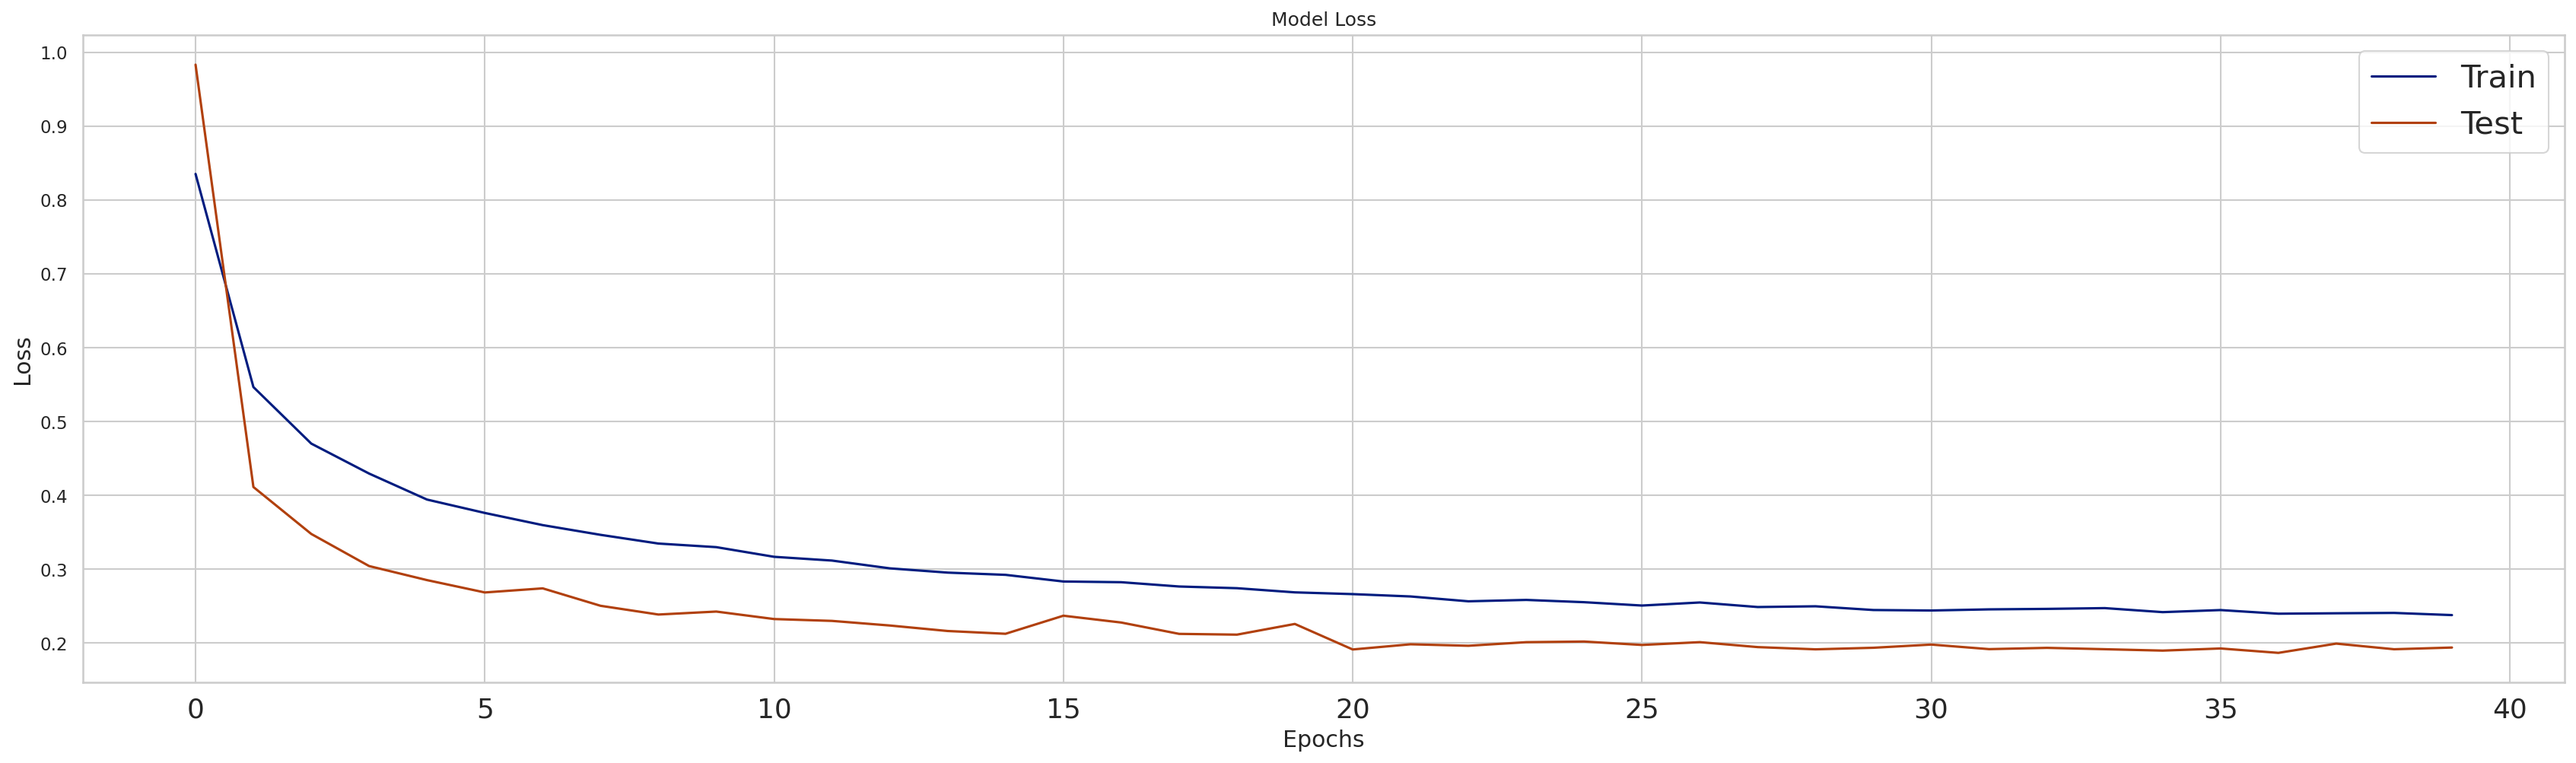

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()


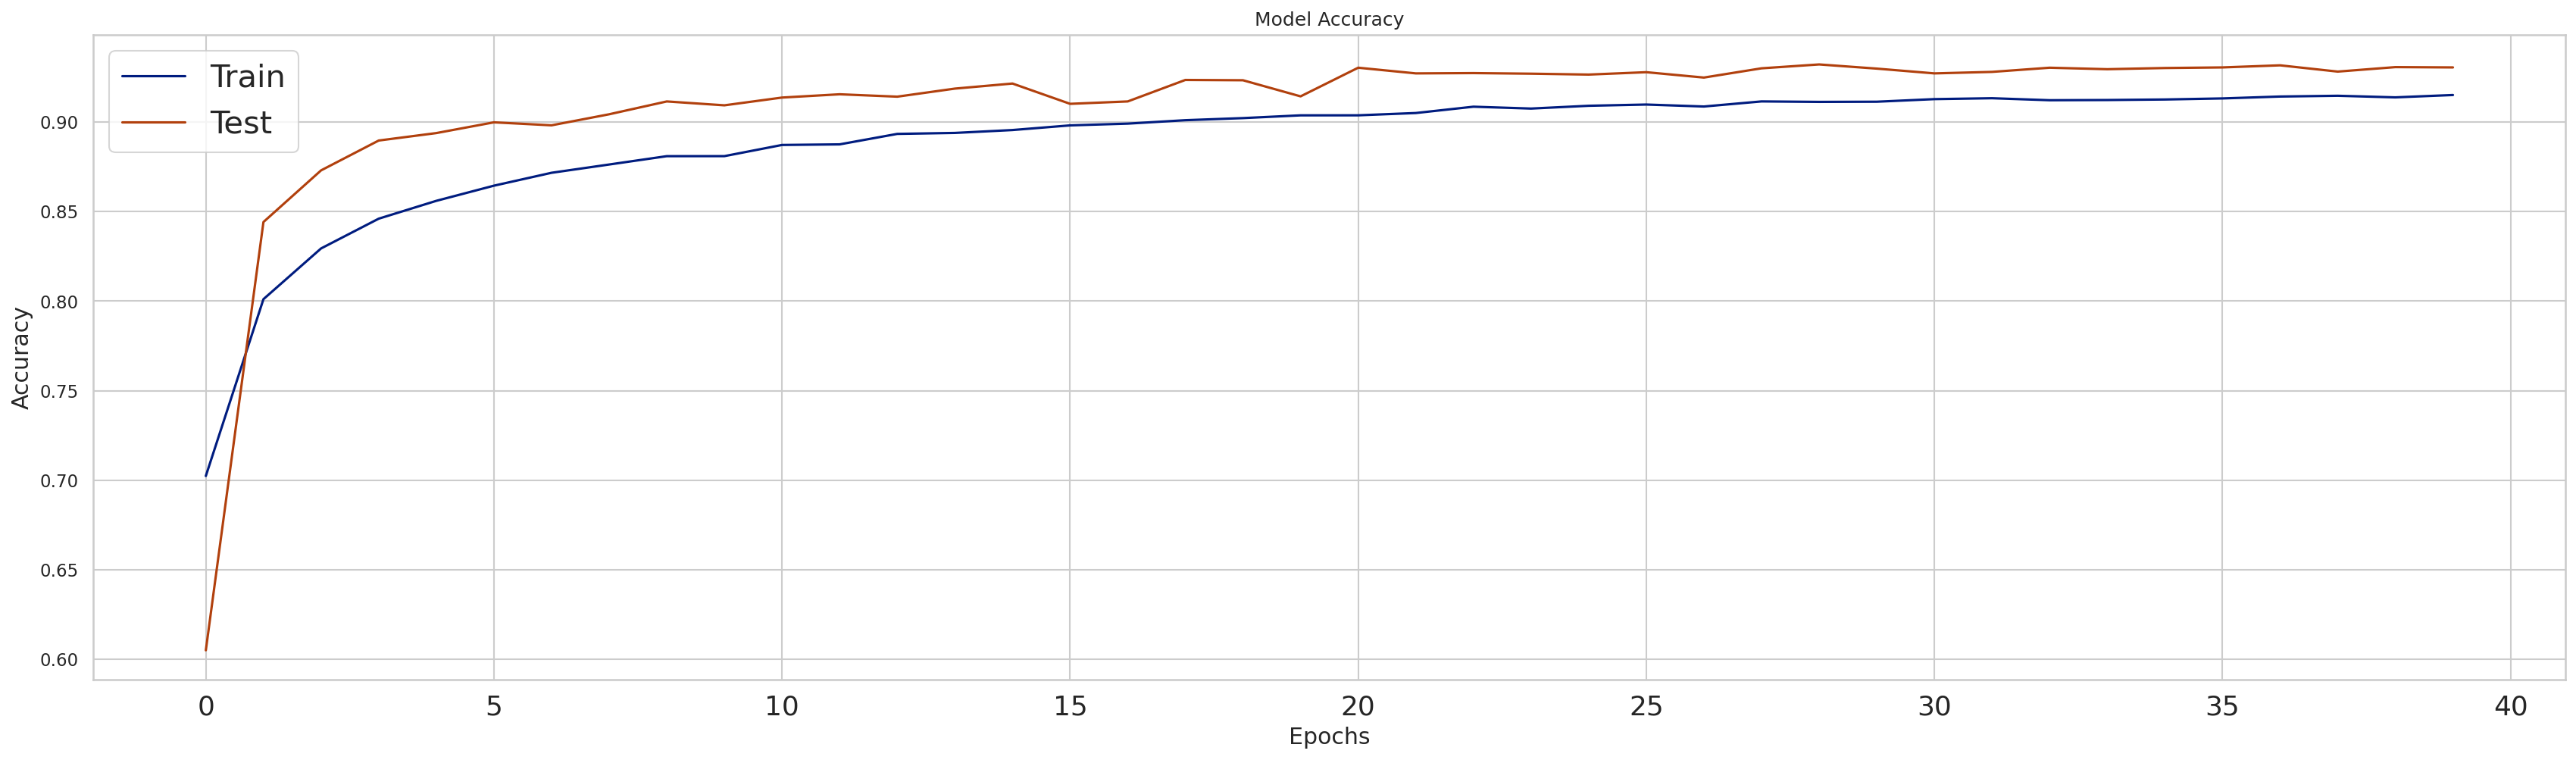

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

188/188 [==============================] - 3s 18ms/step


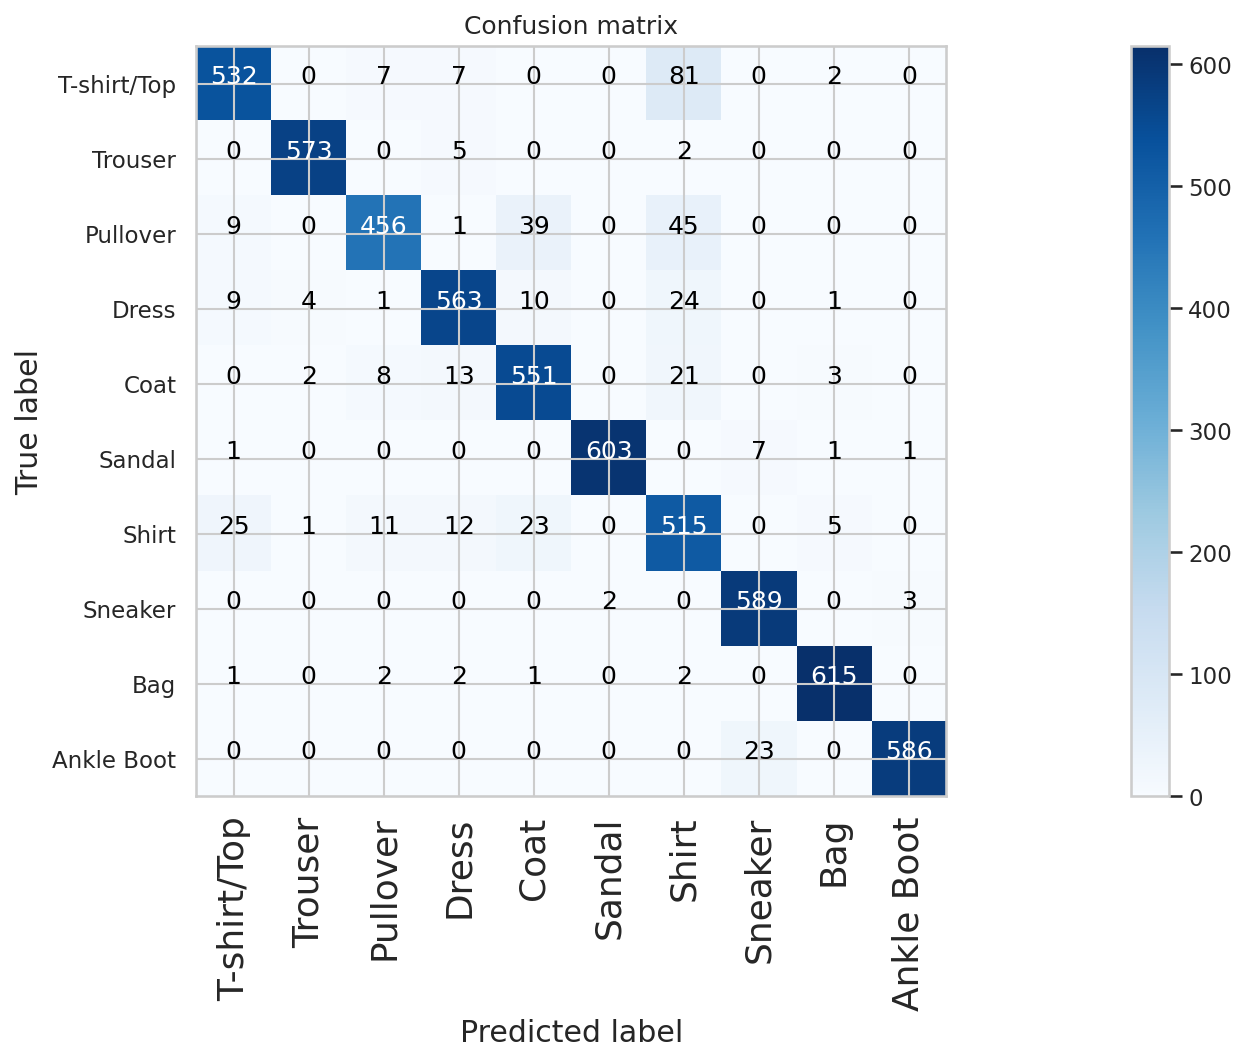

In [50]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx,
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

In [51]:
correct = []
for i in range(len(y_test)):
    if(Y_pred_classes[i] == Y_true[i]):
        correct.append(i)
    if(len(correct) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Sandal\nActual Label : Sandal')

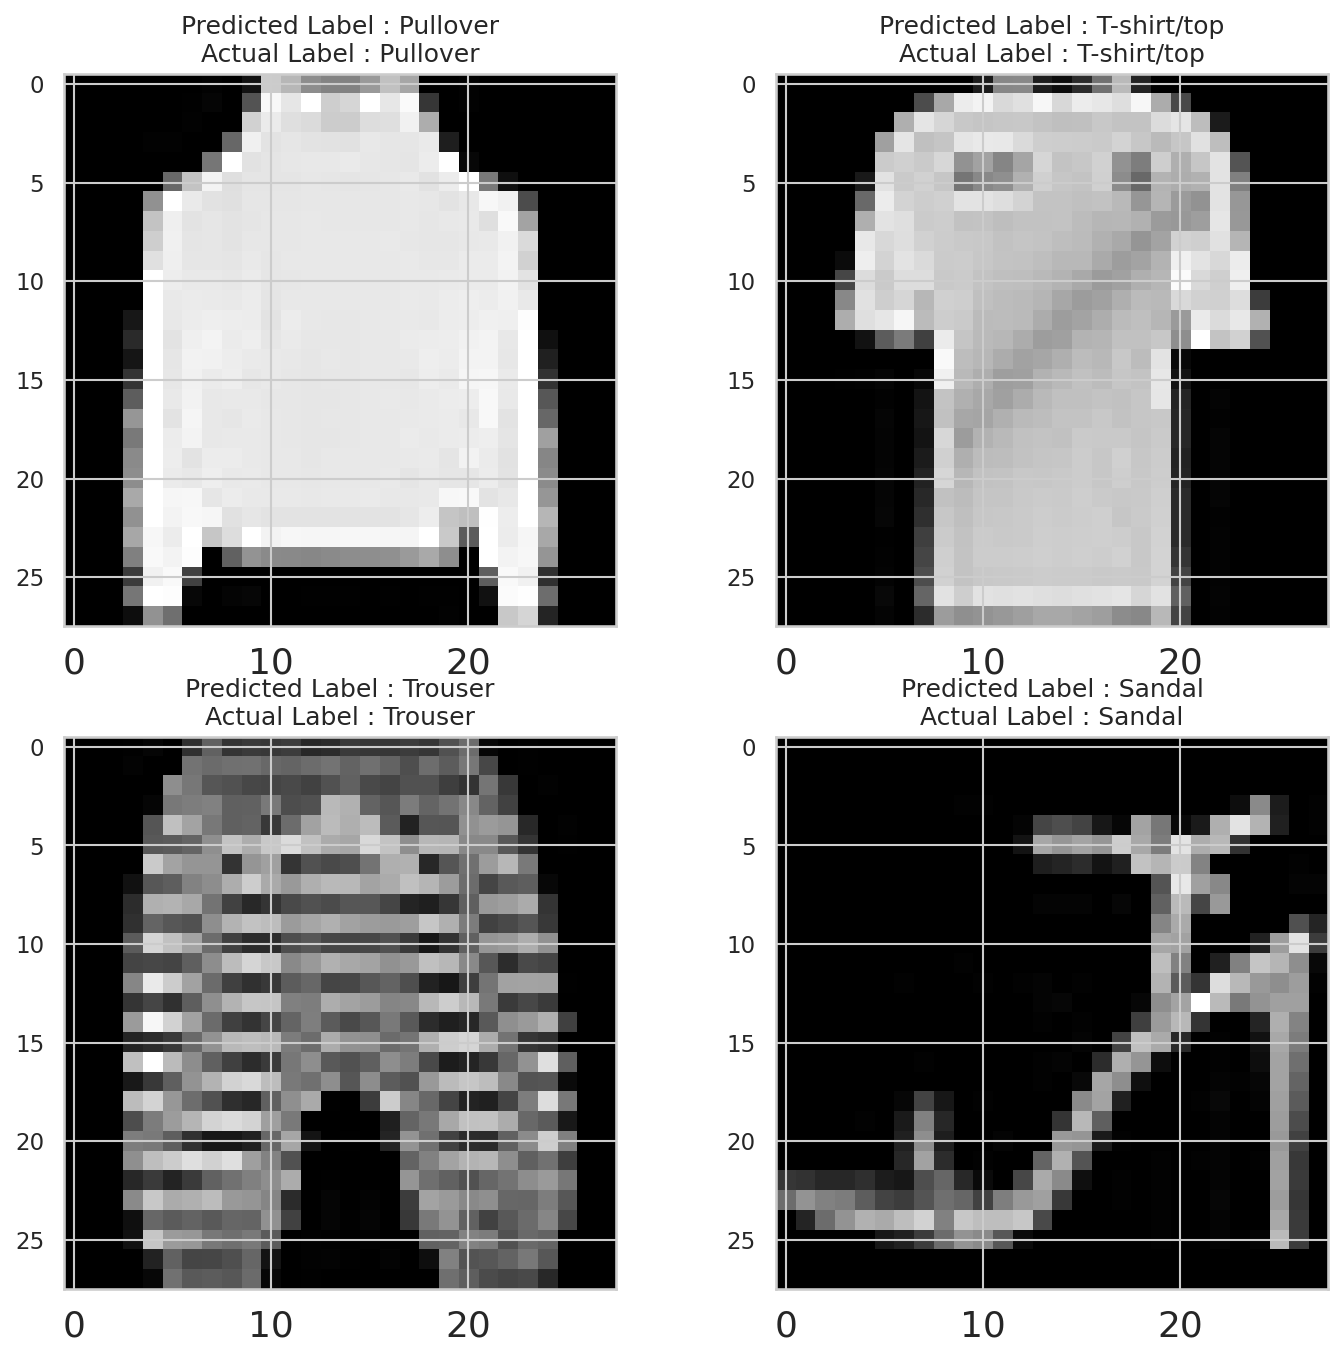

In [52]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[correct[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[0]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[0]]]))
ax[0,1].imshow(x_test[correct[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[1]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[1]]]))
ax[1,0].imshow(x_test[correct[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[2]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[2]]]))
ax[1,1].imshow(x_test[correct[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[correct[3]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[correct[3]]]))

In [53]:
incorrect = []
for i in range(len(y_test)):
    if(not Y_pred_classes[i] == Y_true[i]):
        incorrect.append(i)
    if(len(incorrect) == 4):
        break

Text(0.5, 1.0, 'Predicted Label : Coat\nActual Label : Shirt')

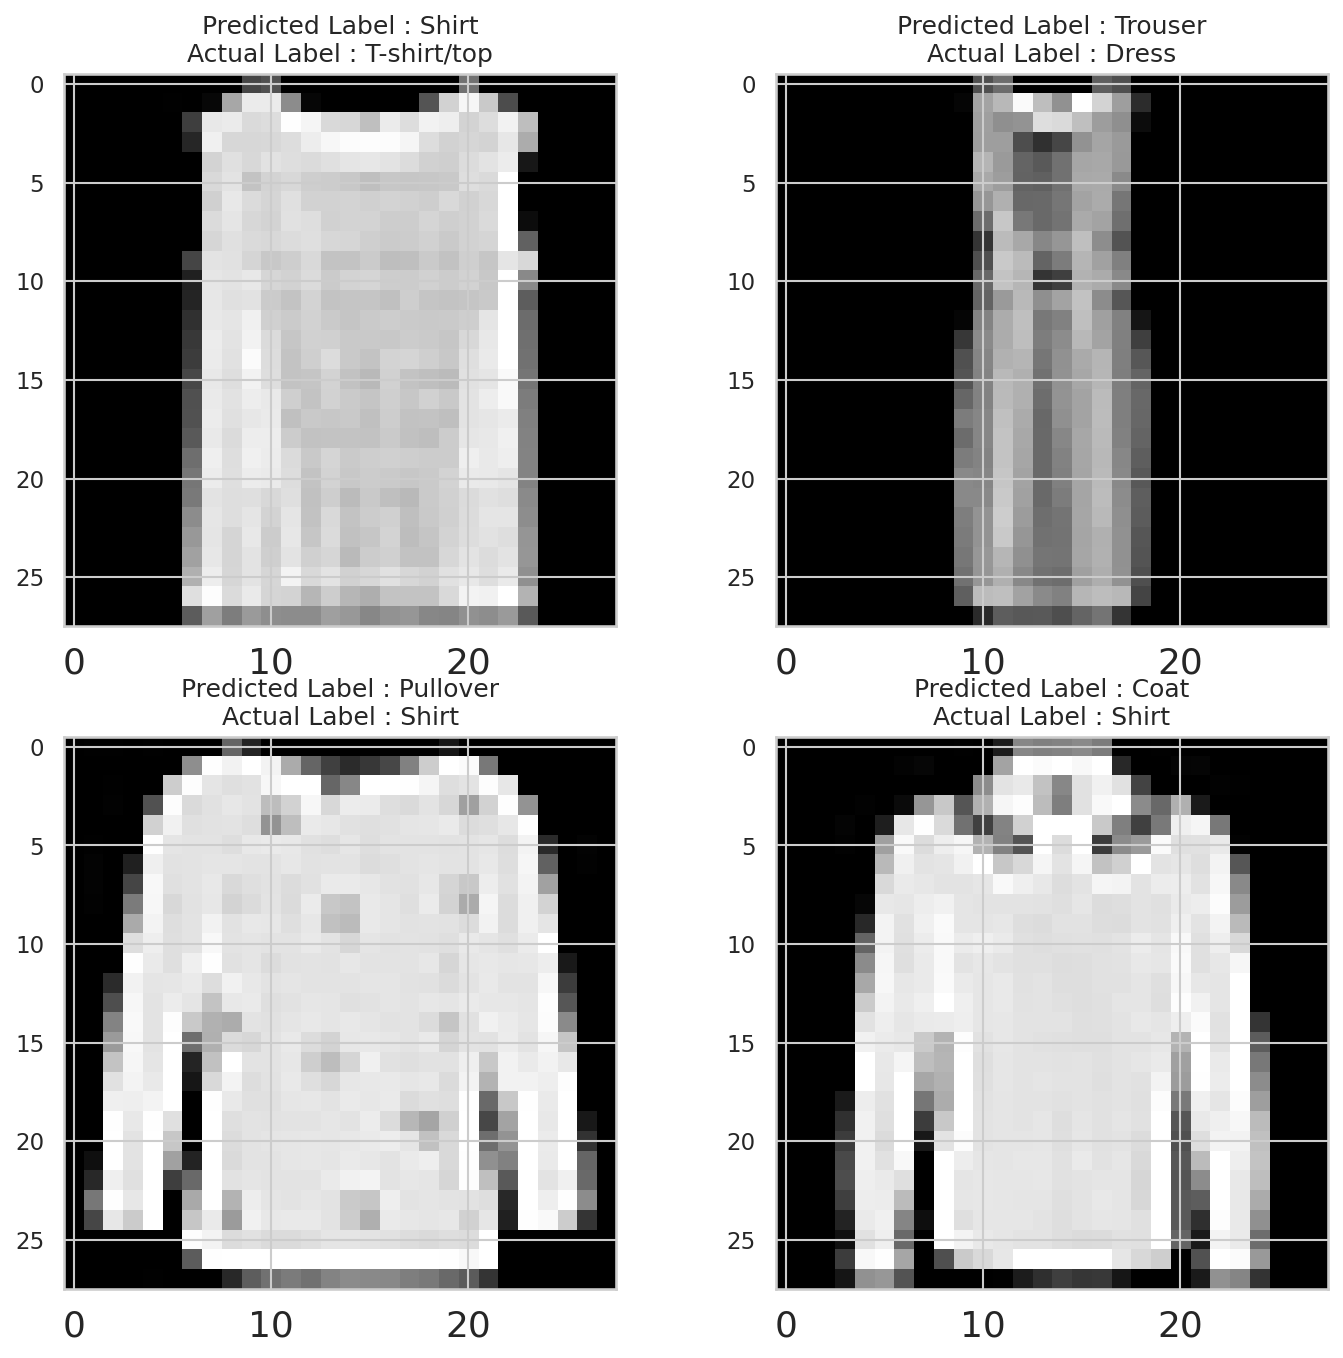

In [54]:
fig, ax = plt.subplots(2,2, figsize=(12,6))
fig.set_size_inches(10,10)
ax[0,0].imshow(x_test[incorrect[0]].reshape(28,28), cmap='gray')
ax[0,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[0]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[0]]]))
ax[0,1].imshow(x_test[incorrect[1]].reshape(28,28), cmap='gray')
ax[0,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[1]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[1]]]))
ax[1,0].imshow(x_test[incorrect[2]].reshape(28,28), cmap='gray')
ax[1,0].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[2]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[2]]]))
ax[1,1].imshow(x_test[incorrect[3]].reshape(28,28), cmap='gray')
ax[1,1].set_title("Predicted Label : " + str(clothing[Y_pred_classes[incorrect[3]]]) + "\n"+"Actual Label : " +
                 str(clothing[Y_true[incorrect[3]]]))

In [55]:
TF_ENABLE_ONEDNN_OPTS= 1

In [56]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print(classification_report(Y_true, Y_pred_classes, target_names = classes))

              precision    recall  f1-score   support

 T-shirt/Top       0.92      0.85      0.88       629
     Trouser       0.99      0.99      0.99       580
    Pullover       0.94      0.83      0.88       550
       Dress       0.93      0.92      0.93       612
        Coat       0.88      0.92      0.90       598
      Sandal       1.00      0.98      0.99       613
       Shirt       0.75      0.87      0.80       592
     Sneaker       0.95      0.99      0.97       594
         Bag       0.98      0.99      0.98       623
  Ankle Boot       0.99      0.96      0.98       609

    accuracy                           0.93      6000
   macro avg       0.93      0.93      0.93      6000
weighted avg       0.93      0.93      0.93      6000



In [57]:
X = df_test
Y = to_categorical(test.iloc[:,0])

In [58]:
score = model.evaluate(X, Y)

print("Loss: {:.4f}".format(score[0]))
print("Optimized Accuracy: {:.4f}".format(score[1]))

313/313 [==============================] - 7s 23ms/step - loss: 0.1933 - accuracy: 0.9304
Loss: 0.1933
Optimized Accuracy: 0.9304


In [59]:
model.save('fashion_mnist_cnn_model.h5') # Save model

In [60]:
#flollowing code is for converting the .h5 format to IR format for openvino

In [61]:
import logging
log = logging.getLogger("openvino")

In [62]:
!wget https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
!sudo apt-key add GPG-PUB-KEY-INTEL-OPENVINO-2021
!echo "deb https://apt.repos.intel.com/openvino/2021 all main" | sudo tee /etc/apt/sources.list.d/intel-openvino-2021.list
!sudo apt update > /dev/null $2>&1
!sudo apt install intel-openvino-dev-ubuntu20-2021.3.394 -y > /dev/null $2>&1
!bash /opt/intel/openvino_2021/bin/setupvars.sh

--2023-07-14 15:21:06--  https://apt.repos.intel.com/openvino/2021/GPG-PUB-KEY-INTEL-OPENVINO-2021
Resolving apt.repos.intel.com (apt.repos.intel.com)... 23.222.195.125, 2600:1406:3c:397::4b23, 2600:1406:3c:38f::4b23
Connecting to apt.repos.intel.com (apt.repos.intel.com)|23.222.195.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 939 [binary/octet-stream]
Saving to: ‘GPG-PUB-KEY-INTEL-OPENVINO-2021.6’

GPG-PUB-KEY-INTEL-O 100%[===================>]     939  --.-KB/s    in 0s      

2023-07-14 15:21:06 (22.9 MB/s) - ‘GPG-PUB-KEY-INTEL-OPENVINO-2021.6’ saved [939/939]

Dear User,

this server does not allow you to run "sudo".

If you need to install a dependency, please put it in your home directory.
* For autotools, you can do it with "./configure --prefix=~/my-path"
* For Python packages, use "pip install <package_name> --user" or create a Conda environment.

Sincerely,
Admins
u194070 is not in the sudoers file.  This incident will be reported.
Dear User,


In [63]:
!python3 -m pip install openvino-dev

Defaulting to user installation because normal site-packages is not writeable


In [65]:
import tensorflow as tf
model = tf.keras.models.load_model("fashion_mnist_cnn_model.h5")
tf.saved_model.save(model,'model')

2023-07-14 15:23:23.506030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,28,28,32]
	 [[{{node inputs}}]]
2023-07-14 15:23:23.517813: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,14,64]
	 [[{{node inputs}}]]
2023-07-14 15:23:23.529751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,14,14,128]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [66]:
model.summary()
print(model.layers[0].name, model.layers[0].get_input_shape_at(0))
print(model.layers[-1].name, model.layers[-1].get_output_at(0).name)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

In [67]:
!pip install openvino

Defaulting to user installation because normal site-packages is not writeable


In [68]:
#I tried it at its almost working but showing minute error in new devices as the location of directory might not be same 

In [69]:
!python3 openvino/model-optimizer/mo_tf.py --fashion_mnist_cnn_model.h5 --input_shape=\[1,28,28\]

python3: can't open file '/home/u194070/openvino/model-optimizer/mo_tf.py': [Errno 2] No such file or directory


In [70]:
!rm -rf *.h5 *.xml *.bin *.mapping model/